# Comparación de operaciones. Pyspark

In [1]:
from pyspark.sql import SparkSession

#spark=SparkSession.builder.master("local[1]").appName("pyspark_comparation").config("spark.some.config.option", "some-value").getOrCreate()

In [2]:
import time
import datetime
from IPython.display import display

In [3]:
spark=SparkSession.builder.appName("pyspark_comparation").config("spark.some.config.option", "some-value").getOrCreate()

In [20]:
prev = datetime.datetime.now()
# File location and type
file_location = "/Users/daniela.almendarez/Desktop/Proyecto_comparacion/Course_info.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
info = spark.read.options(escape='"', header = 'True').option("multiline",'true').csv(file_location)
#info = spark.read.format(file_type).option("inferSchema", infer_schema).option("header", first_row_is_header)\
#.option("sep", delimiter).load(file_location)
info.show(5)
#display(info)
now = datetime.datetime.now()
print(now - prev)

+------+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+---------+-------------------+-------------+--------+--------------------+---------------+------------------+
|    id|               title|is_paid| price|            headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|      published_time|last_update_date| category|        subcategory|        topic|language|          course_url|instructor_name|    instructor_url|
+------+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+---------+-------------------+-------------+--------+--------------------+---------------+------------------+
|4715.0|Online Vegan Vege...|   True| 24.99|Learn to cook del...|         2231.0|      3.75|      134.0|     

In [6]:
# File location and type
file_location2 = "/FileStore/tables/Comments.csv"
#file_type = "csv"

# CSV options
#infer_schema = "true"
#first_row_is_header = "true"
#delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
comments = spark.read.format(file_type).option("inferSchema", infer_schema).option("header", first_row_is_header).option("sep", delimiter).load(file_location)

display(comments)

DataFrame[id: double, title: string, is_paid: string, price: string, headline: string, num_subscribers: string, avg_rating: string, num_reviews: string, num_comments: string, num_lectures: string, content_length_min: double, published_time: string, last_update_date: string, category: string, subcategory: string, topic: string, language: string, course_url: string, instructor_name: string, instructor_url: string]

In [21]:
info.printSchema()

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- is_paid: string (nullable = true)
 |-- price: string (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: string (nullable = true)
 |-- avg_rating: string (nullable = true)
 |-- num_reviews: string (nullable = true)
 |-- num_comments: string (nullable = true)
 |-- num_lectures: string (nullable = true)
 |-- content_length_min: string (nullable = true)
 |-- published_time: string (nullable = true)
 |-- last_update_date: string (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- course_url: string (nullable = true)
 |-- instructor_name: string (nullable = true)
 |-- instructor_url: string (nullable = true)



In [22]:
info=info.withColumn('num_subscribers',info.num_subscribers.cast('int'))
info=info.withColumn('num_reviews',info.num_reviews.cast('int'))
info=info.withColumn('num_comments',info.num_comments.cast('int'))
info=info.withColumn('num_lectures',info.num_lectures.cast('int'))
info=info.withColumn('published_time',info.published_time.cast('timestamp'))
info=info.withColumn('last_update_date',info.last_update_date.cast('date'))
info.printSchema()

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- is_paid: string (nullable = true)
 |-- price: string (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- avg_rating: string (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_comments: integer (nullable = true)
 |-- num_lectures: integer (nullable = true)
 |-- content_length_min: string (nullable = true)
 |-- published_time: timestamp (nullable = true)
 |-- last_update_date: date (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- course_url: string (nullable = true)
 |-- instructor_name: string (nullable = true)
 |-- instructor_url: string (nullable = true)



In [27]:
import pyspark.sql.functions as F
from pyspark.sql.types import StringType

### Creación de una nueva columna con los nombres de usuario, usando regex para extraerlos de los url dados

In [23]:
info = info.withColumn("instructor_username", F.regexp_extract(info.instructor_url, '/[A-Za-z]+/(\S*)/|(\s)',1))
info = info.withColumn("course_name", F.regexp_extract(info.course_url, '/[A-Za-z]+/(\S*)/|(\s)',1))
info.show()

+------+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+-------------------+----------------+--------------------+--------------------+---------------+--------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    id|               title|is_paid| price|            headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|     published_time|last_update_date|            category|         subcategory|          topic|language|          course_url|     instructor_name|      instructor_url| instructor_username|         course_name|
+------+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+-------------------+----------------+--------------------+--------------------+---------------+--------+--------------------+--------

### Muestra el curso más antiguo y el más reciente con su fecha de publicación

In [9]:
old_date=F.min('published_time').alias('Primer_curso')
recent_date=F.max('published_time').alias('Ultimo_curso')
dates=info.select(old_date,recent_date).collect()
info.select(info.published_time,info.last_update_date,info.title).filter(info.published_time.isin([dates[0][0],dates[0][1]])).show()

+-------------------+----------------+--------------------+
|     published_time|last_update_date|               title|
+-------------------+----------------+--------------------+
|2010-01-12 12:09:46|            null|The Lean Startup ...|
|2022-10-05 12:04:08|      2022-10-03|Manual para la Pe...|
+-------------------+----------------+--------------------+



### Cuenta el número de cursos por lenguaje

In [24]:
courses_per_language=info.groupBy(info.language).count()
courses_per_language=courses_per_language.sort(F.col('count').desc())
courses_per_language.show(courses_per_language.count(),False)

+-------------------+------+
|language           |count |
+-------------------+------+
|English            |123921|
|Portuguese         |18471 |
|Spanish            |17428 |
|Turkish            |8100  |
|Japanese           |7006  |
|German             |6101  |
|French             |5465  |
|Arabic             |5197  |
|Italian            |3637  |
|Russian            |2686  |
|Hindi              |1758  |
|Korean             |1660  |
|Indonesian         |1580  |
|Polish             |1530  |
|Traditional Chinese|1014  |
|Simplified Chinese |995   |
|Urdu               |530   |
|Thai               |338   |
|Romanian           |298   |
|Tamil              |257   |
|Dutch              |227   |
|Hebrew             |203   |
|Vietnamese         |180   |
|Hungarian          |116   |
|Greek              |105   |
|Bengali            |85    |
|Telugu             |85    |
|Azeri              |82    |
|Marathi            |70    |
|Malayalam          |60    |
|Persian            |43    |
|Ukrainian    

### Cursos con mayor número de suscriptores

In [29]:
info.select('title', 'instructor_name', 'published_time', 'num_subscribers').sort(F.col('num_subscribers').desc()).show(10)

+--------------------+---------------+-------------------+---------------+
|               title|instructor_name|     published_time|num_subscribers|
+--------------------+---------------+-------------------+---------------+
|Java Tutorial for...|   John Purcell|2012-09-30 15:11:57|        1752364|
|2022 Complete Pyt...|  Jose Portilla|2015-10-12 16:42:53|        1612862|
|Microsoft Excel -...|       Kyle Pew|2016-03-16 15:31:03|        1108811|
|Automate the Bori...|    Al Sweigart|2015-09-21 16:10:01|        1056369|
|Machine Learning ...|Kirill Eremenko|2016-09-13 16:43:44|         896340|
|The Web Developer...|    Colt Steele|2015-11-02 15:13:27|         823805|
|Introduction To P...|   Avinash Jain|2015-03-01 19:23:00|         783638|
|The Complete 2022...|  Dr. Angela Yu|2018-10-25 16:34:15|         771176|
|Java Programming ...|   Tim Buchalka|2015-07-21 17:01:13|         720304|
|The Complete Digi...|   Rob Percival|2016-08-01 19:09:38|         706339|
+--------------------+---

### Número de cursos con 0 y 1 subscriptor

In [34]:
one_subs=info.select('num_subscribers').filter(info.num_subscribers==1).count()
cero_subs=info.select('num_subscribers').filter(info.num_subscribers==0).count()

print('Sin subscriptores:',cero_subs)
print('Un subscriptor:',one_subs)

Sin subscriptores: 9456
Un subscriptor: 5698


### Creación de una función udf para extraer los nombres de pila de los instructores

In [32]:
def getFirstName(name):
	ans = ""
	if name is None:
		return "None"
	sname = name.split()
	prefix = ['mr.','mrs.','ms.','dr.','prof.','sr.','jr.','.',',','mr','mrs','ms','dr','prof','sr','jr']
	for i in range(len(sname)):
		sname[i] = sname[i].lower()
	if len(sname) > 0 and sname[0] not in prefix:
		ans = sname[0]
	elif len(sname) > 1 and sname[1] not in prefix:
		ans = sname[1]
	elif len(sname) > 2 and sname[2] not in prefix:
		ans = sname[2]
	ans =ans.capitalize()
	return ans
getFirstNameUdf = F.udf(lambda x:getFirstName(x),StringType())

In [33]:
info = info.withColumn("name", getFirstNameUdf(info.instructor_name))
info.show()

Py4JJavaError: An error occurred while calling o275.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 52.0 failed 1 times, most recent failure: Lost task 0.0 in stage 52.0 (TID 83) (DESKTOP-O78POMS.bosonit.local executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:188)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:108)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:121)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:162)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:81)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:130)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:863)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:863)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1462)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:175)
	... 24 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2454)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2403)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2402)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2402)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1160)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2584)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2573)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2214)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2235)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2254)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:476)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:429)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:48)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3715)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2728)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3706)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3704)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2728)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2935)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:287)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:326)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:188)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:108)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:121)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:162)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:81)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:130)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:863)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:863)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1462)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:175)
	... 24 more


### Creación de una función udf a partir de la función gender.Detector de python para obtener el género de los instructores

In [10]:
import gender_guesser.detector as gender
gd = gender.Detector()
get_gender_udf = udf(lambda x:gd.get_gender(x),StringType())

In [0]:
info = info.withColumn("gender", get_gender_udf(col("name")))
known_instructors =info.filter("gender != 'unknown' ")
display(known_instructors)

id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,instructor_username,course_name,name,gender
4715.0,Online Vegan Vegetarian Cooking School,True,24.99,"Learn to cook delicious vegan recipes. Filmed over 15 years ago, watch the first 2hrs FREE to see if it's right for you.",2231,3.75,134,42,37,1268.0,2010-08-05T22:06:13.000+0000,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/,angelapoch,vegan-vegetarian-cooking-school,Angela,female
1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.0,"""Debunking Myths of Entrepreneurship A startup is not a """"doll house"""" version of a larger enterprise.""",26474,4.5,709,112,9,88.0,2010-01-12T18:09:46.000+0000,null,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-entrepreneurship/,Eric Ries,/user/ericries/,ericries,the-lean-startup-debunking-myths-of-entrepreneurship,Eric,male
5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change that will bring you health and a clear conscience.,1713,4.4,41,13,14,82.0,2010-10-13T18:07:17.000+0000,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becoming-vegetarian/,Angela Poch,/user/angelapoch/,angelapoch,see-my-personal-motivation-for-becoming-vegetarian,Angela,female
7723.0,How to Train a Puppy,True,199.99,"Train your puppy the right way with Dr. Ian Dunbar. Includes 13 videos, 4 books, and 16 behavior blueprints.",4988,4.8,395,88,36,1511.0,2011-06-20T20:08:38.000+0000,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/,ian-dunbar,complete-dunbar-collection,Ian,male
8139.0,14-Day Yoga Detox and Empowerment Course,True,29.99,"Lose weight, get healthier and fit on all levels in just 14 days with Sadie Nardini",20505,4.5301204,796,135,31,1163.0,2011-07-15T04:13:24.000+0000,2018-05-22,Health & Fitness,Yoga,Yoga,English,/course/yoga-for-weight-loss-and-core-strength-with-sadie-nardini/,Sadie Nardini,/user/sadienardini/,sadienardini,yoga-for-weight-loss-and-core-strength-with-sadie-nardini,Sadie,female
2762.0,Simple Strategy for Swing Trading the Stock Market,True,39.99,Use my favorite Technical Indicator and the Trading Strategy I've developed for Swing Trading Stocks,3309,3.85,958,241,8,80.0,2010-04-14T16:32:46.000+0000,2019-03-07,Finance & Accounting,Investing & Trading,Swing Trading,English,/course/swing-trading-the-stock-market/,Tom Watson,/user/tomwatson/,tomwatson,swing-trading-the-stock-market,Tom,male
8082.0,Ruby Programming for Beginners,True,74.99,Learn Ruby Programming the fast and easy way!,28824,4.0,741,189,56,363.0,2011-07-08T21:32:55.000+0000,2022-09-26,Development,Programming Languages,Ruby,English,/course/learn-ruby-programming-in-ten-easy-steps/,Huw Collingbourne,/user/huwcollingbourne/,huwcollingbourne,learn-ruby-programming-in-ten-easy-steps,Huw,male
8075.0,How to Create an Awesome Demo Video for Your Business,True,149.99,You don't need to spend $10K in order to have a professional video produced. Learn to make one yourself the easy way!,10761,3.9,349,101,87,526.0,2011-07-06T14:06:34.000+0000,2020-11-22,Business,Media,Demo Video,English,/course/how-to-create-awesome-demo-videos/,Miguel Hernandez,/user/miguelhernandez/,miguelhernandez,how-to-create-awesome-demo-videos,Miguel,male
8069.0,Curso SEO Online,True,99.99,Curso SEO práctico. Aprenda a posicionar su sitio web en los primeros puestos de los buscadores,483,4.65,100,45,73,373.0,2012-07-03T17:03:28.000+0000,2020-02-28,Marketing,Search Engine Optimization,SEO,Spanish,/course/curso-de-posicionamiento-en-buscadores-seo/,Juan Jose Ramos,/user/juanjo-ramos/,juanjo-ramos,curso-de-posicionamiento-en-buscadores-

In [0]:
avg_num_subscribers_per_gender = known_instructors.groupBy('gender').agg(mean("num_subscribers"))
display(avg_num_subscribers_per_gender)

gender,avg(num_subscribers)
mostly_female,2999.4655693651325
female,1526.7226274555208
andy,2980.0412158681092
male,3594.535691805447
mostly_male,3624.2197286012524


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

Out[18]: <AxesSubplot:xlabel='gender', ylabel='avg(num_subscribers)'>

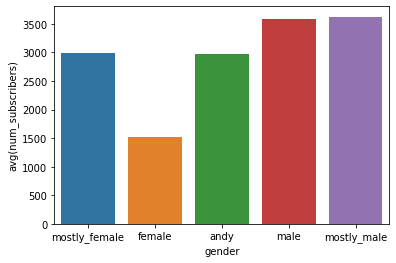

In [0]:
pltp = avg_num_subscribers_per_gender.toPandas()

sns.barplot(data = pltp, x ="gender", y = "avg(num_subscribers)")


Out[19]: <AxesSubplot:xlabel='gender', ylabel='avg(avg_rating)'>

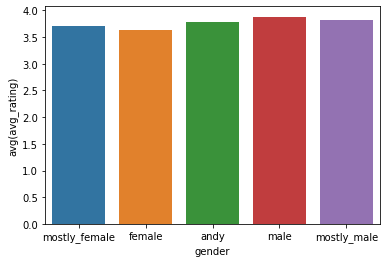

In [0]:
avg_avg_rating = known_instructors.groupBy('gender').agg(mean("avg_rating"))

sns.barplot(data = avg_avg_rating.toPandas(), x ="gender", y = "avg(avg_rating)")